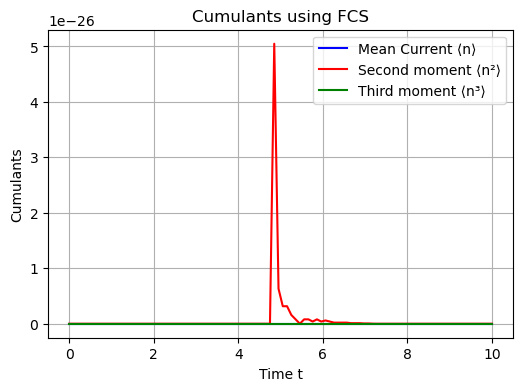

In [7]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# Defining Pauli matrices
sigma_plus = np.array([[0, 1], [0, 0]], dtype=complex)
sigma_minus = np.array([[0, 0], [1, 0]], dtype=complex)
identity = np.eye(2, dtype=complex)

# Defining parameters
Theta_0 = 1.0
chi_param = 0.5
t_vals = np.linspace(0, 10, 100)  # Time range
chi_vals = np.linspace(-np.pi, np.pi, 100) # Chi range

# Function to compute c(t)
def c_t_complex(t):
    d = np.sqrt(chi_param**2 - 2 * Theta_0 * chi_param + 0j)
    return np.exp(-chi_param * t / 2) * (np.cosh(d * t / 2) + (chi_param / (d + 1e-10)) * np.sinh(d * t / 2))

# Computing time derivative of c(t)
def c_dot_t_complex(t):
    d = np.sqrt(chi_param**2 - 2 * Theta_0 * chi_param + 0j)
    return - (chi_param / 2) * c_t_complex(t) + (d / 2) * np.exp(-chi_param * t / 2) * (np.sinh(d * t / 2) + (chi_param / (d + 1e-10)) * np.cosh(d * t / 2))

# Computing Gamma(t) and S(t)
gamma_t_complex = -2 * np.real(c_dot_t_complex(t_vals) / (c_t_complex(t_vals) + 1e-10))
S_t_complex = -2 * np.imag(c_dot_t_complex(t_vals) / (c_t_complex(t_vals) + 1e-10))

# Defining the tilted Liouvillian
def tilted_Liouvillian_complex(chi, t_idx):
    commutator = -1j * S_t_complex[t_idx] * (np.kron(identity, sigma_plus @ sigma_minus) - np.kron((sigma_plus @ sigma_minus).T, identity))

    dissipation = gamma_t_complex[t_idx] * (np.exp(1j * chi) * np.kron(sigma_minus, sigma_plus.T) -  
                                            0.5 * np.kron(identity, (sigma_plus @ sigma_minus).T) -  
                                            0.5 * np.kron((sigma_plus @ sigma_minus), identity))

    return commutator + dissipation

# Computing CGF at different times
cgf_time_series_complex = []
for t_idx, t in enumerate(t_vals):
    cgf_vals = []
    for chi in chi_vals:
        K_chi = tilted_Liouvillian_complex(chi, t_idx)
        eigvals = la.eigvals(K_chi)
        cgf_vals.append(eigvals[np.argmax(np.real(eigvals))])  # CGF from dominant eigenvalue
    cgf_time_series_complex.append(cgf_vals)

cgf_time_series_complex = np.array(cgf_time_series_complex)



def numerical_derivative(cgf_vals, chi_vals, order):
    derivatives = cgf_vals
    for _ in range(order):
        derivatives = np.gradient(derivatives, chi_vals, edge_order=2)  # Differentiate
    idx_0 = np.argmin(np.abs(chi_vals))  # Find index closest to χ = 0
    return (1j)**order * derivatives[idx_0]  # Evaluate at χ = 0


mean_current = [numerical_derivative(cgf_time_series_complex[i], chi_vals, 1) for i in range(len(t_vals))]
second_moment = [numerical_derivative(cgf_time_series_complex[i], chi_vals, 2) for i in range(len(t_vals))]
third_moment = [numerical_derivative(cgf_time_series_complex[i], chi_vals, 3) for i in range(len(t_vals))]


# Function to check if imaginary part is negligible
def check_imaginary(name, values, threshold=1e-10):
    max_imag = np.max(np.abs(np.imag(values)))
    if max_imag > threshold:
        print(f"Warning: {name} has non-negligible imaginary parts (max imaginary value: {max_imag})")
    return np.real(values)  # Return only the real part

# Converting to real values only if imaginary part is negligible
mean_current = check_imaginary("Mean Current", mean_current)
second_moment = check_imaginary("Second Moment", second_moment)
third_moment = check_imaginary("Third Moment", third_moment)

# Plotting results
plt.figure(figsize=(6, 4))
plt.plot(t_vals, mean_current, label="Mean Current ⟨n⟩", color="b")
plt.plot(t_vals, second_moment, label="Second moment ⟨n²⟩", color="r")
plt.plot(t_vals, third_moment, label="Third moment ⟨n³⟩", color="g")
plt.xlabel("Time t")
plt.ylabel("Cumulants")
plt.title("Cumulants using FCS")
plt.legend()
plt.grid()
plt.show()

<>:27: SyntaxWarning: invalid escape sequence '\G'
<>:27: SyntaxWarning: invalid escape sequence '\G'
C:\Users\debop\AppData\Local\Temp\ipykernel_14924\648762951.py:27: SyntaxWarning: invalid escape sequence '\G'
  plt.title("$\Gamma(t)$")


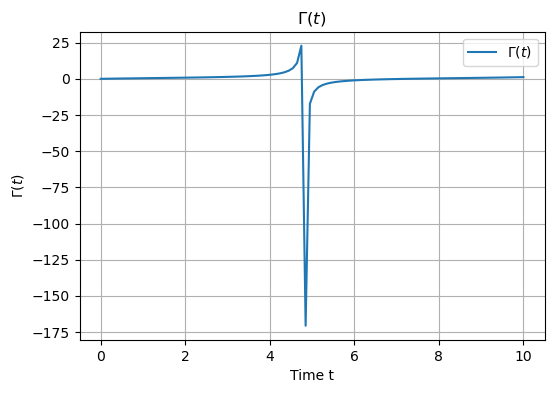

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Defining parameters
Theta_0 = 1.0
chi_param = 0.5
t_vals = np.linspace(0, 10, 100)  # Time range

# Function to compute c(t)
def c_t_complex(t):
    d = np.sqrt(chi_param**2 - 2 * Theta_0 * chi_param + 0j)
    return np.exp(-chi_param * t / 2) * (np.cosh(d * t / 2) + (chi_param / (d + 1e-10)) * np.sinh(d * t / 2))

# Computing time derivative of c(t)
def c_dot_t_complex(t):
    d = np.sqrt(chi_param**2 - 2 * Theta_0 * chi_param + 0j)
    return - (chi_param / 2) * c_t_complex(t) + (d / 2) * np.exp(-chi_param * t / 2) * (np.sinh(d * t / 2) + (chi_param / (d + 1e-10)) * np.cosh(d * t / 2))

# Computing Gamma(t)
gamma_t = -2 * np.real(c_dot_t_complex(t_vals) / (c_t_complex(t_vals) + 1e-10))

# Plotting Gamma(t)
plt.figure(figsize=(6, 4))
plt.plot(t_vals, gamma_t, label=r'$\Gamma(t)$')
plt.xlabel("Time t")
plt.ylabel(r'$\Gamma(t)$')
plt.title("$\Gamma(t)$")
plt.legend()
plt.grid()
plt.show()


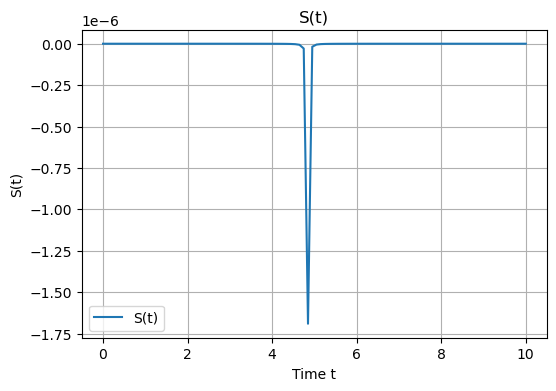

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Defining parameters
Theta_0 = 1.0
chi_param = 0.5
t_vals = np.linspace(0, 10, 100)  # Time range

# Function to compute c(t)
def c_t_complex(t):
    d = np.sqrt(chi_param**2 - 2 * Theta_0 * chi_param + 0j)
    return np.exp(-chi_param * t / 2) * (np.cosh(d * t / 2) + (chi_param / (d + 1e-10)) * np.sinh(d * t / 2))

# Computing time derivative of c(t)
def c_dot_t_complex(t):
    d = np.sqrt(chi_param**2 - 2 * Theta_0 * chi_param + 0j)
    return - (chi_param / 2) * c_t_complex(t) + (d / 2) * np.exp(-chi_param * t / 2) * (np.sinh(d * t / 2) + (chi_param / (d + 1e-10)) * np.cosh(d * t / 2))

# Computing S(t)
S_t = -2 * np.imag(c_dot_t_complex(t_vals) / (c_t_complex(t_vals) + 1e-10))

# Plotting S(t)
plt.figure(figsize=(6, 4))
plt.plot(t_vals, S_t, label="S(t)")
plt.xlabel("Time t")
plt.ylabel("S(t)")
plt.title("S(t)")
plt.legend()
plt.grid()
plt.show()

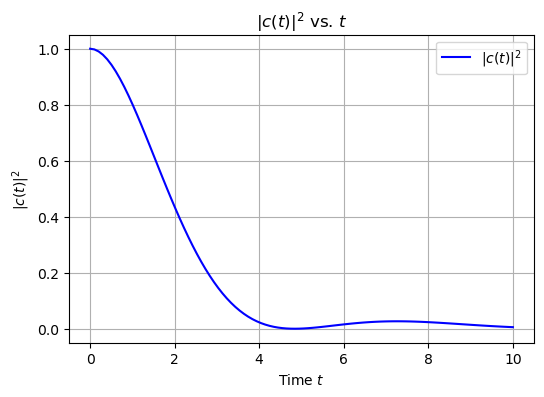

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Defining parameters
Theta_0 = 1.0
chi_param = 0.5
t_vals = np.linspace(0, 10, 100)  # Time range

# Function to compute c(t)
def c_t_complex(t):
    d = np.sqrt(chi_param**2 - 2 * Theta_0 * chi_param + 0j)
    return np.exp(-chi_param * t / 2) * (np.cosh(d * t / 2) + (chi_param / (d + 1e-10)) * np.sinh(d * t / 2))

# Computing |c(t)|^2
c_t_vals = c_t_complex(t_vals)
c_t_squared = np.abs(c_t_vals)**2

# Plotting |c(t)|^2 as a function of t
plt.figure(figsize=(6, 4))
plt.plot(t_vals, c_t_squared, label=r'$|c(t)|^2$', color='b')
plt.xlabel("Time $t$")
plt.ylabel(r'$|c(t)|^2$')
plt.title("$|c(t)|^2$ vs. $t$")
plt.legend()
plt.grid()
plt.show()


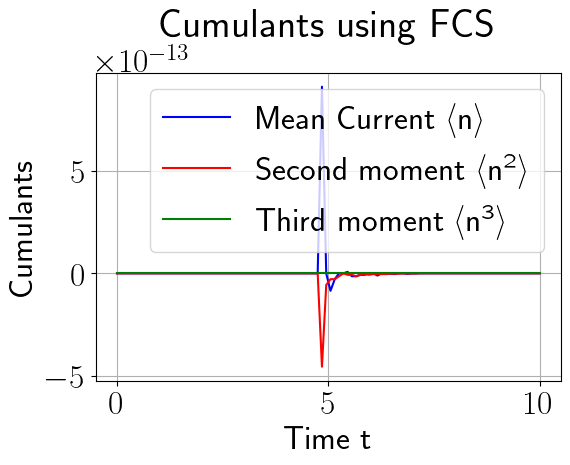

In [14]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# Defining Pauli matrices
sigma_plus = np.array([[0, 1], [0, 0]], dtype=complex)
sigma_minus = np.array([[0, 0], [1, 0]], dtype=complex)
identity = np.eye(2, dtype=complex)

# Defining parameters
Theta_0 = 1.0
chi_param = 0.5
t_vals = np.linspace(0, 10, 100)  # Time range
chi_vals = np.linspace(-0.1, 0.1, 10)  # chi range

# Function to compute c(t)
def c_t_complex(t):
    d = np.sqrt(chi_param**2 - 2 * Theta_0 * chi_param + 0j)
    return np.exp(-chi_param * t / 2) * (np.cosh(d * t / 2) + (chi_param / (d + 1e-10)) * np.sinh(d * t / 2))

# Computing time derivative of c(t)
def c_dot_t_complex(t):
    d = np.sqrt(chi_param**2 - 2 * Theta_0 * chi_param + 0j)
    return - (chi_param / 2) * c_t_complex(t) + (d / 2) * np.exp(-chi_param * t / 2) * (np.sinh(d * t / 2) + (chi_param / (d + 1e-10)) * np.cosh(d * t / 2))

# Computing Gamma(t) and S(t)
gamma_t_complex = -2 * np.real(c_dot_t_complex(t_vals) / (c_t_complex(t_vals) + 1e-10))
S_t_complex = -2 * np.imag(c_dot_t_complex(t_vals) / (c_t_complex(t_vals) + 1e-10))

# Defining the tilted Liouvillian including particle counting
def tilted_Liouvillian_complex(chi, t_idx):
    commutator = -1j * S_t_complex[t_idx] * (np.kron(identity, sigma_plus @ sigma_minus) - np.kron((sigma_plus @ sigma_minus).T, identity))
    
    
    dissipation = gamma_t_complex[t_idx] * (np.exp(1j * chi) * np.kron(sigma_minus, sigma_plus.T) -
                                            0.5 * np.kron(identity, (sigma_plus @ sigma_minus).T) -
                                            0.5 * np.kron((sigma_plus @ sigma_minus), identity))
    
    return commutator + dissipation

# Computing CGF at different times
cgf_time_series_complex = []
for t_idx, t in enumerate(t_vals):
    cgf_vals = []
    for chi in chi_vals:
        K_chi = tilted_Liouvillian_complex(chi, t_idx)
        eigvals = la.eigvals(K_chi)
        cgf_vals.append(np.max(np.real(eigvals)))  # CGF from dominant eigenvalue
    cgf_time_series_complex.append(cgf_vals)

cgf_time_series_complex = np.array(cgf_time_series_complex)

# Computing first three derivatives at chi = 0 (numerically)
def numerical_derivative(cgf_vals, chi_vals, order):
    return np.gradient(cgf_vals, chi_vals, edge_order=2)[order]

mean_current = [numerical_derivative(cgf_time_series_complex[i], chi_vals, 0) for i in range(len(t_vals))]
second_moment = [numerical_derivative(cgf_time_series_complex[i], chi_vals, 1) for i in range(len(t_vals))]
third_moment = [numerical_derivative(cgf_time_series_complex[i], chi_vals, 2) for i in range(len(t_vals))]

# Plotting results
plt.figure(figsize=(6, 4))
plt.plot(t_vals, mean_current, label="Mean Current ⟨n⟩", color="b")
plt.plot(t_vals, second_moment, label="Second moment ⟨n²⟩", color="r")
plt.plot(t_vals, third_moment, label="Third moment ⟨n³⟩", color="g")
plt.xlabel("Time t")
plt.ylabel("Cumulants")
plt.title("Cumulants using FCS")
plt.legend()
plt.grid()
plt.show()

In [19]:
cgf_time_series_complex.shape

(100, 10)

## Squeezed generalized amplitude damping channel

In [1]:
import sympy as sm
import qutip as qt
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid

plt.rcParams.update({
    "text.usetex": True,
    "font.size" : 24})

In [2]:
# Define the Hamiltonian
def Ham(Δ, Ω):
    return Δ*0.5*qt.sigmaz() + Ω*qt.sigmax()

Δ = 0
Nb = 0.2
Ω, γt = 1, 1.0
H = Ham(Δ, Ω)
c_ops = [np.sqrt(γt*(Nb + 1))*qt.sigmam(), np.sqrt(γt*Nb)*qt.sigmap()]

# Compute steadystate
rhoss = qt.steadystate(H, c_ops)

def tilted_liouvillian(H, L_list, chi, v_list):
    """
    Constructs a tilted Liouvillian for a system with multiple jump operators and corresponding v values.

    Parameters:
    H : Qobj
        The Hamiltonian of the system.
    L_list : list of Qobj
        A list of jump operators.
    chi : float
        The tilt parameter.
    v_list : list of float
        A list of parameters that couple with chi, one for each jump operator.

    Returns:
    Qobj
        The tilted Liouvillian superoperator.
    """
    # Check that the number of jump operators matches the number of v values
    if len(L_list) != len(v_list):
        raise ValueError("The number of jump operators must match the number of v values.")
    
    # Hamiltonian part remains the same
    H_vec = qt.spre(H) - qt.spost(H)
    
    # Initialize the dissipative part
    L_vec_total = 0
    
    # Loop through all jump operators and their corresponding v values
    for L, v in zip(L_list, v_list):
        L_vec = np.exp(1j * chi * v) * qt.to_super(L) - 0.5 * (qt.spre(L.dag() * L) + qt.spost(L.dag() * L))
        L_vec_total += L_vec
    
    # Combine Hamiltonian and dissipative parts
    return -1j * H_vec + L_vec_total

rhoss

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.42971888+0.j         0.        -0.20080321j]
 [0.        +0.20080321j 0.57028112+0.j        ]]

In [14]:
# Compute vectorised density operator
rhovec = qt.operator_to_vector(rhoss)

# Create chi space
v = [-1, 1]
chi = np.linspace(-np.pi, np.pi, 1000)
d_chi = chi[1]-chi[0]

# t = [5, 15, 30, 50]
t = np.linspace(0, 500, 500)

# Compute tilted Liouvillians
liouvs = [tilted_liouvillian(H, c_ops, i, v) for i in chi]
rho_chi = [[qt.vector_to_operator((liou * ti).expm()*rhovec) for liou in liouvs] for ti in t]

# Take trace of all rhochis
pchis = np.array([[rho.tr() for rho in rhoix] for rhoix in rho_chi])
# tilted_liouvillian(H, c_ops, chi[6], v)

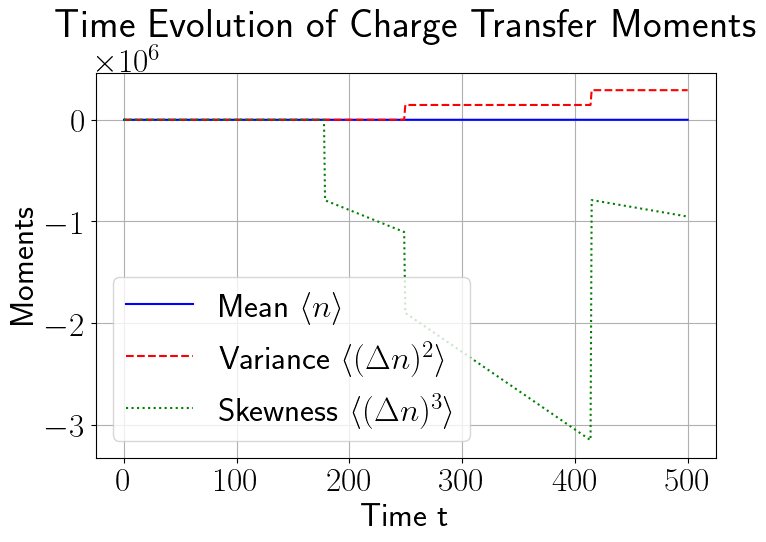

In [ ]:
# Compute the cumulant generating function S(chi, t) = log P(chi, t)
S_chi_t = np.log(np.maximum(pchis, 1e-10))  # Avoid log(0) errors

# Compute moments by differentiation at each time step
dS_dchi = np.gradient(S_chi_t, 1j * chi, axis=1)  # First derivative -> Mean
d2S_dchi2 = np.gradient(dS_dchi, 1j * chi, axis=1)  # Second derivative -> Variance
d3S_dchi3 = np.gradient(d2S_dchi2, 1j * chi, axis=1)  # Third derivative -> Skewness

# Find index for chi = 0
chi_0_index = np.argmin(np.abs(chi))

# Extract time evolution of moments
mean_n_t = np.real(dS_dchi[:, chi_0_index])
variance_n_t = np.real(d2S_dchi2[:, chi_0_index])
skewness_n_t = np.real(d3S_dchi3[:, chi_0_index])

# Plot time evolution of moments
plt.figure(figsize=(8, 5))
plt.plot(t, mean_n_t, label=r"Mean $\langle n \rangle$", color="blue")
plt.plot(t, variance_n_t, label=r"Variance $\langle (\Delta n)^2 \rangle$", color="red", linestyle="dashed")
plt.plot(t, skewness_n_t, label=r"Skewness $\langle (\Delta n)^3 \rangle$", color="green", linestyle="dotted")
plt.xlabel("Time t")
plt.ylabel("Moments")
plt.legend()
plt.title("Time Evolution of Charge Transfer Moments")
plt.grid()
plt.show()

In [10]:
dS_dchi = np.gradient(S_chi_t, 1j*chi, axis=1)

chi_0_index = np.argmin(np.abs(chi))
mean_n_t = np.real(dS_dchi[:, chi_0_index])

d2S_dchi2 = np.gradient(dS_dchi, 1j * chi, axis=1)
variance_n_t = np.real(d2S_dchi2[:, chi_0_index])
variance_n_t

array([ 0.        ,  0.38999454,  0.76688422,  1.21736276,  1.64871692,
        2.07662851,  2.50780027,  2.93846772,  3.36888639,  3.79943543,
        4.22997761,  4.6605061 ,  5.09103926,  5.52157275,  5.95210559,
        6.38263857,  6.81317159,  7.24370458,  7.67423758,  8.10477058,
        8.53530357,  8.96583657,  9.39636957,  9.82690256, 10.25743556,
       10.68796856, 11.11850155, 11.54903455, 11.97956755, 12.41010054,
       12.84063354, 13.27116653, 13.70169953, 14.13223253, 14.56276552,
       14.99329852, 15.42383152, 15.85436451, 16.28489751, 16.71543051,
       17.1459635 , 17.5764965 , 18.0070295 , 18.43756249, 18.86809549,
       19.29862849, 19.72916148, 20.15969448, 20.59022748, 21.02076047,
       21.45129347, 21.88182647, 22.31235946, 22.74289246, 23.17342546,
       23.60395845, 24.03449145, 24.46502444, 24.89555744, 25.32609044,
       25.75662343, 26.18715643, 26.61768943, 27.04822242, 27.47875542,
       27.90928842, 28.33982141, 28.77035441, 29.20088741, 29.63

In [ ]:
# Compute moments by differentiation at each time step
dS_dchi = np.gradient(S_chi_t, 1j * chi, axis=1)  # First derivative -> Mean
d2S_dchi2 = np.gradient(dS_dchi, 1j * chi, axis=1)  # Second derivative -> Variance
d3S_dchi3 = np.gradient(d2S_dchi2, 1j * chi, axis=1)  # Third derivative -> Skewness

# Find index for chi = 0
chi_0_index = np.argmin(np.abs(chi))

# Extract time evolution of moments
mean_n_t = np.real(dS_dchi[:, chi_0_index])
variance_n_t = np.real(d2S_dchi2[:, chi_0_index])
skewness_n_t = np.real(d3S_dchi3[:, chi_0_index])

In [31]:
def numerical_derivative(cgf_vals, chi_vals, order):
    derivatives = cgf_vals
    for _ in range(order):
        derivatives = np.gradient(derivatives, chi_vals, edge_order=2)  # Differentiate
    idx_0 = np.argmin(np.abs(chi_vals))  # Find index closest to χ = 0
    return (1j)**order * derivatives[idx_0]  # Evaluate at χ = 0


mean_current = [numerical_derivative(pchis[i], chi, 1) for i in range(len(t))]
second_moment = [numerical_derivative(pchis[i], chi, 2) for i in range(len(t))]
third_moment = [numerical_derivative(pchis[i], chi, 3) for i in range(len(t))]

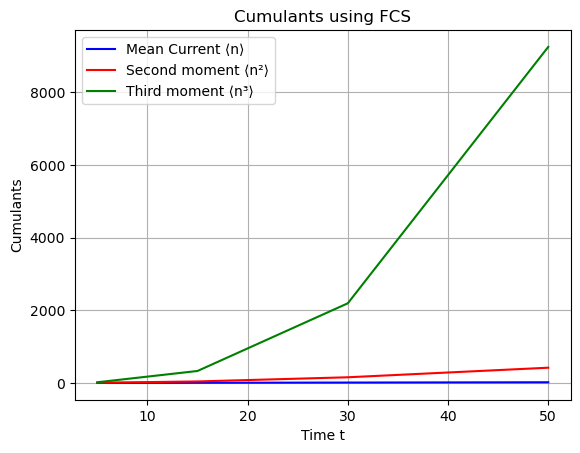

In [32]:
# Function to check if imaginary part is negligible
def check_imaginary(name, values, threshold=1e-10):
    max_imag = np.max(np.abs(np.imag(values)))
    if max_imag > threshold:
        print(f"Warning: {name} has non-negligible imaginary parts (max imaginary value: {max_imag})")
    return np.real(values)  # Return only the real part

# Converting to real values only if imaginary part is negligible
mean_current = check_imaginary("Mean Current", mean_current)
second_moment = check_imaginary("Second Moment", second_moment)
third_moment = check_imaginary("Third Moment", third_moment)

# Plotting results
# plt.figure(figsize=(6, 4))
plt.plot(t, mean_current, label="Mean Current ⟨n⟩", color="b")
plt.plot(t, second_moment, label="Second moment ⟨n²⟩", color="r")
plt.plot(t, third_moment, label="Third moment ⟨n³⟩", color="g")
plt.xlabel("Time t")
plt.ylabel("Cumulants")
plt.title("Cumulants using FCS")
plt.legend()
plt.grid()
plt.show()

In [27]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
from scipy.optimize import approx_fprime  # Use this instead of scipy.misc.derivative

# Define Pauli operators
sigma_plus = qt.sigmap()
sigma_minus = qt.sigmam()
sigma_z = qt.sigmaz()
sigma_x = qt.sigmax()

# Define parameters
chi = 0.8
Theta0 = 0.6

# Define c(t) function
def c_t(t, args):
    chi = args['chi']
    Theta0 = args['Theta0']
    d_squared = chi**2 - 2 * Theta0 * chi
    d = np.sqrt(d_squared) if d_squared > 0 else 1.0  # Ensure d is real
    return np.exp(-chi * t / 2) * (np.cosh(d * t / 2) + (chi / d) * np.sinh(d * t / 2))

# Numerical derivative
def numerical_derivative(f, t, args, dx=1e-4):
    return approx_fprime(np.array([t]), lambda x: f(x[0], args), dx)[0]

# Compute Θ(t) safely
def Theta_t(t, args):
    c_t_val = c_t(t, args)
    if c_t_val == 0:
        return 0  # Avoid division by zero
    return -2 * np.real(numerical_derivative(c_t, t, args) / c_t_val)

# Compute S(t) safely
def S_t(t, args):
    c_t_val = c_t(t, args)
    if c_t_val == 0:
        return 0  # Avoid division by zero
    return -2 * np.imag(numerical_derivative(c_t, t, args) / c_t_val)

# Define time-dependent Hamiltonian
H = [[sigma_plus * sigma_minus, S_t]]

# Define collapse operators
c_ops = [[sigma_minus, Theta_t]]

# Initial state: Excited state
psi0 = qt.basis(2, 1) * qt.basis(2, 1).dag()

# Time evolution parameters
tlist = np.linspace(0, 10, 100)  # Time from 0 to 10

# Arguments to pass to functions
args = {'chi': chi, 'Theta0': Theta0}

# Use a more stable solver method
options = {'nsteps': 20000, 'rtol': 1e-7, 'atol': 1e-9, 'method': 'bdf'}

# Solve the master equation
result = qt.mesolve(H, psi0, tlist, c_ops, e_ops=[], args=args, options=options)

# # Plot the results
# plt.plot(tlist, result.expect[0])
# plt.xlabel("Time")
# plt.ylabel("Expectation of sigma_z")
# plt.title("Non-Markovian Dynamics")
# plt.show()


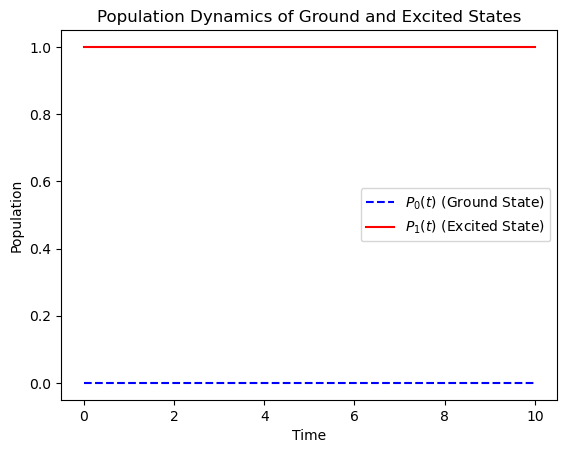

In [28]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

# Define basis states
ground_state = qt.basis(2, 0)  # |0⟩
excited_state = qt.basis(2, 1)  # |1⟩

# Extract populations: P0(t) = ⟨0|ρ(t)|0⟩ and P1(t) = ⟨1|ρ(t)|1⟩
pop_ground = [rho.matrix_element(ground_state.dag(), ground_state) for rho in result.states]
pop_excited = [rho.matrix_element(excited_state.dag(), excited_state) for rho in result.states]

# Plot the populations over time
plt.plot(tlist, pop_ground, label=r"$P_0(t)$ (Ground State)", linestyle='--', color='blue')
plt.plot(tlist, pop_excited, label=r"$P_1(t)$ (Excited State)", linestyle='-', color='red')

# Labels and legend
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics of Ground and Excited States")
plt.legend()
plt.show()


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

Gamma = 1.0
Eta = 0.8
X_12 = 0.6
r = 0.5
phi = 0.0
Nq = 2
N = 0.2

Ntilde = N * (np.sinh(r)**2 + np.cosh(r)**2) + np.sinh(r)**2
M = - 0.5 * np.sinh(2*r) * np.exp(1j*phi) * (2*N + 1)


sm = [qt.tensor([qt.sigmam() if m==n else qt.qeye(2) for m in range(Nq)]) for n in range(Nq)]

qt.destroy(2)*qt.basis(2, 0)

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]]